In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # ignore warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [2]:
# Read csv
df = pd.read_csv('medical_clean.csv')

In [3]:
# Get summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
# Check for missing values
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [6]:
# Drop irrelevant columns
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
                      'VitD_levels', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink','TimeZone', 'Job', 'Additional_charges', 'TotalCharge', 
                      'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [7]:
# See cleaned data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  object 
 6   Doc_visits          10000 non-null  int64  
 7   Initial_admin       10000 non-null  object 
 8   HighBlood           10000 non-null  object 
 9   Stroke              10000 non-null  object 
 10  Complication_risk   10000 non-null  object 
 11  Overweight          10000 non-null  object 
 12  Arthritis           10000 non-null  object 
 13  Diabetes            10000 non-null  object 
 14  Hyperlipidemia      10000 non-null  object 
 15  BackPain            10000 non-null  object 
 16  Anxie

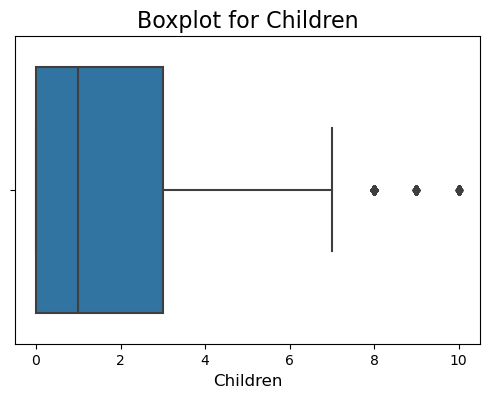

In [8]:
# Check for outliers in 'Children'
plt.figure(figsize=(6, 4))  # Adjust figure size 
sns.boxplot(x=df["Children"])

# Add title and labels
plt.title("Boxplot for Children", fontsize=16)
plt.xlabel("Children", fontsize=12)

# Show the plot
plt.show()

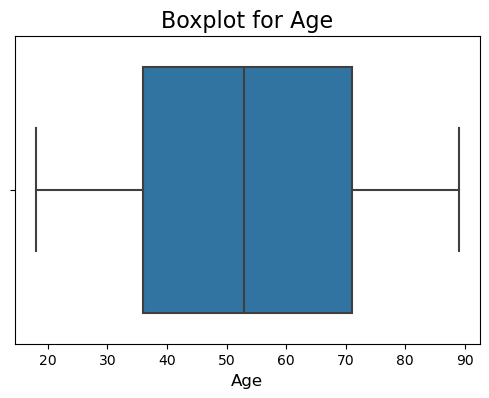

In [9]:
# Check for outliers in 'Age'
plt.figure(figsize=(6, 4))  # Adjust figure size 
sns.boxplot(x=df["Age"])

# Add title and labels
plt.title("Boxplot for Age", fontsize=16)
plt.xlabel("Age", fontsize=12)

# Show the plot
plt.show()

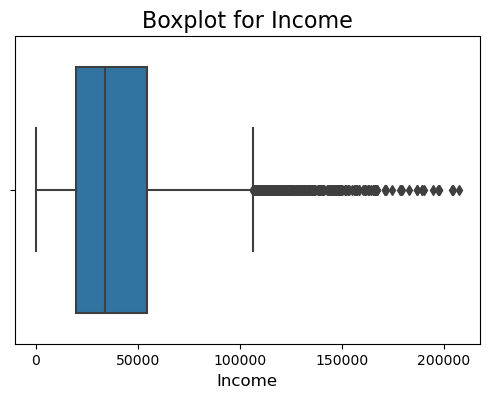

In [10]:
# Check for outliers in 'Income'
plt.figure(figsize=(6, 4))  # Adjust figure size 
sns.boxplot(x=df["Income"])

# Add title and labels
plt.title("Boxplot for Income", fontsize=16)
plt.xlabel("Income", fontsize=12)

# Show the plot
plt.show()

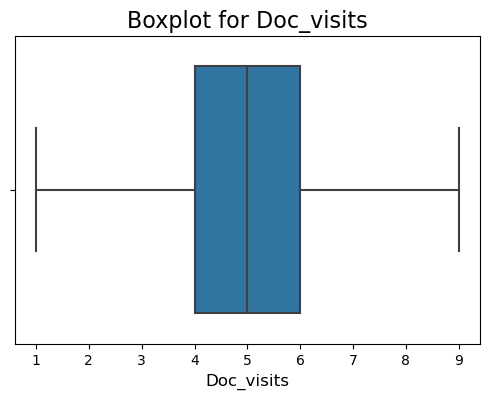

In [11]:
# Check for outliers in 'Doc_visits'
plt.figure(figsize=(6, 4))  # Adjust figure size 
sns.boxplot(x=df["Doc_visits"])

# Add title and labels
plt.title("Boxplot for Doc_visits", fontsize=16)
plt.xlabel("Doc_visits", fontsize=12)

# Show the plot
plt.show()

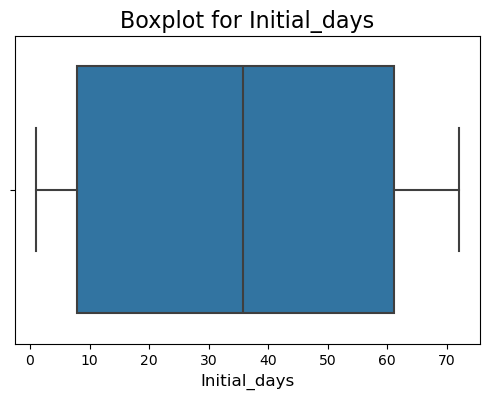

In [12]:
# Check for outliers in 'Initial_days'
plt.figure(figsize=(6, 4))  # Adjust figure size 
sns.boxplot(x=df["Initial_days"])

# Add title and labels
plt.title("Boxplot for Initial_days", fontsize=16)
plt.xlabel("Initial_days", fontsize=12)

# Show the plot
plt.show()

In [13]:
# Get summary statistics info for continuous variables
df.describe()

,Children,Age,Income,Doc_visits,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.097200,53.511700,40490.495160,5.012200,34.455299
std,2.163659,20.638538,28521.153293,1.045734,26.309341
min,0.000000,18.000000,154.080000,1.000000,1.001981
25%,0.000000,36.000000,19598.775000,4.000000,7.896215
50%,1.000000,53.000000,33768.420000,5.000000,35.836244
75%,3.000000,71.000000,54296.402500,6.000000,61.161020
max,10.000000,89.000000,207249.100000,9.000000,71.981490


In [14]:
# Get value counts for 'Marital'
df['Marital'].value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [15]:
# Get value counts for 'Gender'
df['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [16]:
# Get value counts for 'ReAdmis'
df['ReAdmis'].value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [17]:
# Get value counts for 'Initial_admin'
df['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [18]:
# Get value counts for 'HighBlood'
df['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [19]:
# Get value counts for 'Stroke'
df['Stroke'].value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [20]:
# Get value counts for 'Complication_risk'
df['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [21]:
# Get value counts for 'Overweight'
df['Overweight'].value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [22]:
# Get value counts for 'Arthritis'
df['Arthritis'].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [23]:
# Get value counts for 'Diabetes'
df['Diabetes'].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [24]:
# Get value counts for 'Hyperlipidemia'
df['Hyperlipidemia'].value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [25]:
# Get value counts for 'BackPain'
df['BackPain'].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [26]:
# Get value counts for 'Asthma'
df['Asthma'].value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [27]:
# Get value counts for 'Anxiety'
df['Anxiety'].value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [28]:
# Get value counts for 'Allergic_rhinitis'
df['Allergic_rhinitis'].value_counts()

Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

In [29]:
# Get value counts for 'Reflux_esophagitis'
df['Reflux_esophagitis'].value_counts()

Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

In [30]:
# Get value counts for 'Services'
df['Services'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

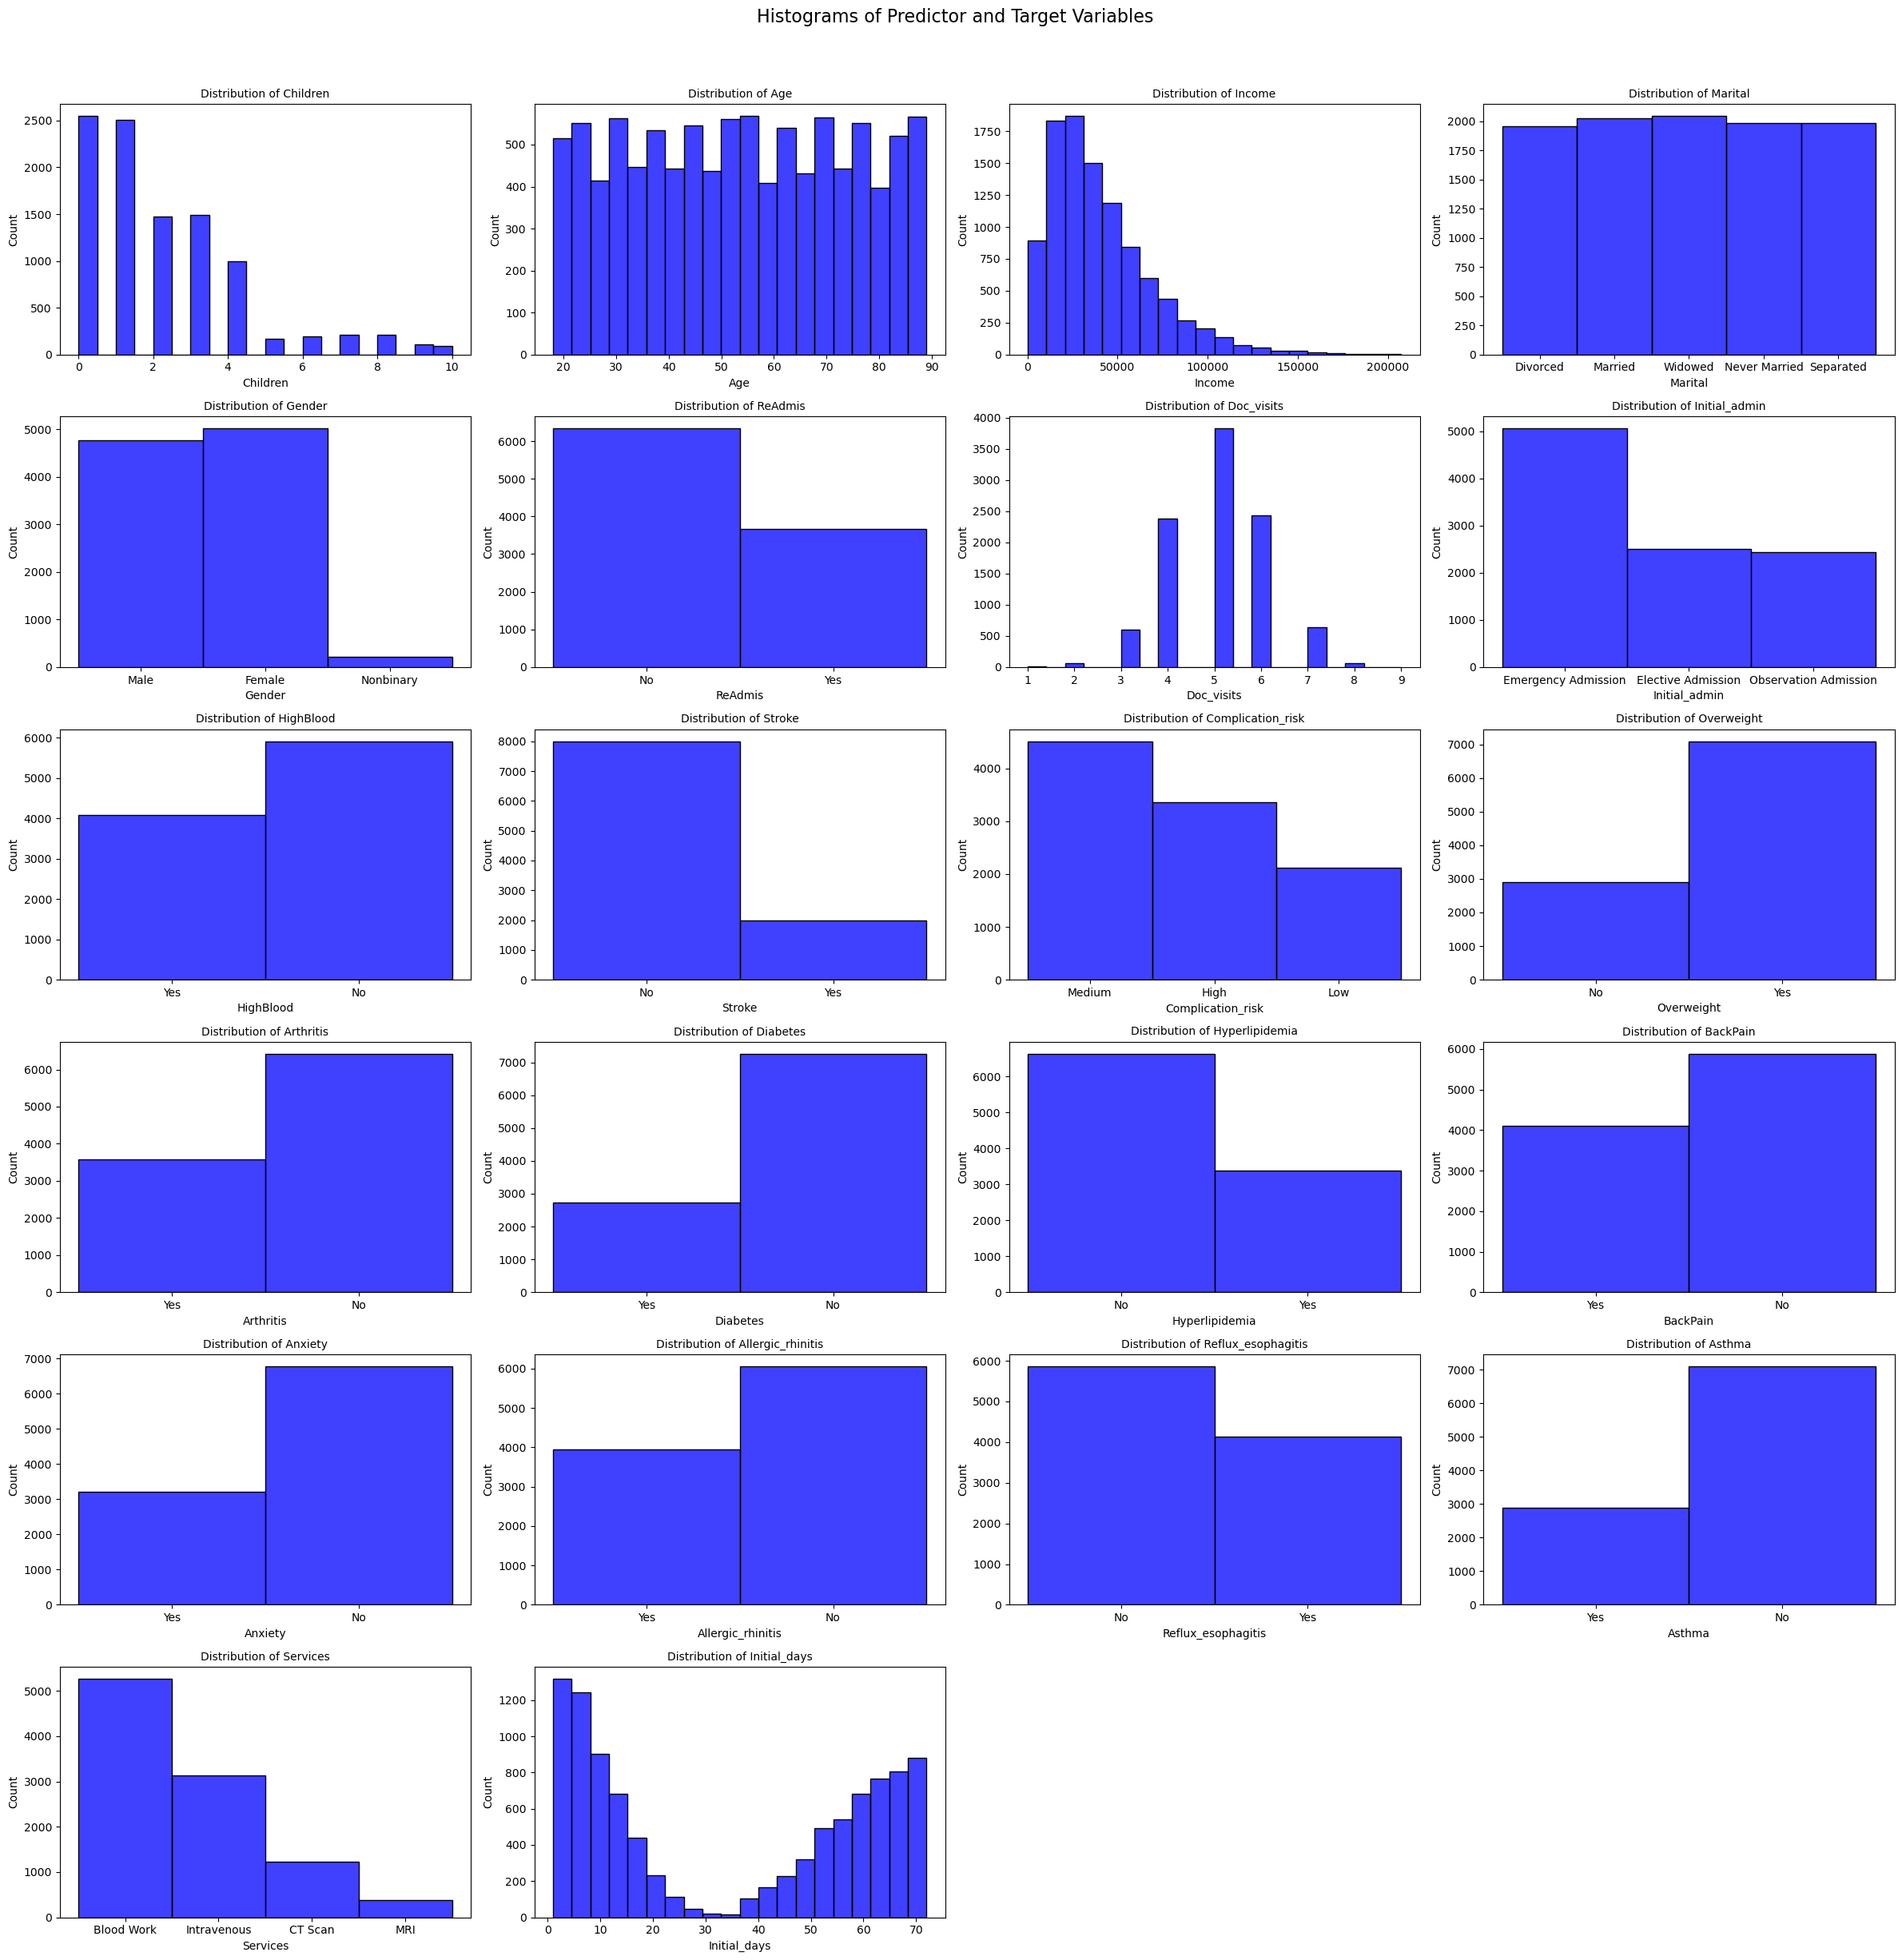

In [31]:
# Create histogram grid

# Define the number of columns in the grid
num_cols = 4

# Calculate the number of rows required
num_rows = math.ceil(len(df.columns) / num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 24))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Add spacing between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each predictor variable and the target variable to plot the histograms
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=20, kde=False, ax=axes[i], color='blue')  # Plot histogram
    axes[i].set_title(f"Distribution of {col}", fontsize=10)  # Add title
    axes[i].set_xlabel(col)  # Label x-axis
    axes[i].set_ylabel("Count")  # Label y-axis

# Remove unused subplots
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

# Add overall title for the grid of plots
plt.suptitle("Histograms of Predictor and Target Variables", fontsize=16, y=1.02)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
# Re-express categorical variables w/ Yes/No values
yes_no = {"Yes": 1, "No": 0}
df["HighBlood"] = df["HighBlood"].replace(yes_no).infer_objects(copy=False)
df["Stroke"] = df["Stroke"].replace(yes_no).infer_objects(copy=False)
df["Overweight"] = df["Overweight"].replace(yes_no).infer_objects(copy=False)
df["Arthritis"] = df["Arthritis"].replace(yes_no).infer_objects(copy=False)
df["Diabetes"] = df["Diabetes"].replace(yes_no).infer_objects(copy=False)
df["Hyperlipidemia"] = df["Hyperlipidemia"].replace(yes_no).infer_objects(copy=False)
df["BackPain"] = df["BackPain"].replace(yes_no).infer_objects(copy=False)
df["Asthma"] = df["Asthma"].replace(yes_no).infer_objects(copy=False)
df["Anxiety"] = df["Anxiety"].replace(yes_no).infer_objects(copy=False)
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].replace(yes_no).infer_objects(copy=False)
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].replace(yes_no).infer_objects(copy=False)
df["ReAdmis"] = df["ReAdmis"].replace(yes_no).infer_objects(copy=False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  int64  
 6   Doc_visits          10000 non-null  int64  
 7   Initial_admin       10000 non-null  object 
 8   HighBlood           10000 non-null  int64  
 9   Stroke              10000 non-null  int64  
 10  Complication_risk   10000 non-null  object 
 11  Overweight          10000 non-null  int64  
 12  Arthritis           10000 non-null  int64  
 13  Diabetes            10000 non-null  int64  
 14  Hyperlipidemia      10000 non-null  int64  
 15  BackPain            10000 non-null  int64  
 16  Anxie

In [34]:
# Create dummy variables for other categorical variables and concatenate them with the original dataframe
df = pd.concat([df, pd.get_dummies(df["Marital"], prefix="Marital", drop_first=True, dtype='int')], axis=1)
df = pd.concat([df, pd.get_dummies(df["Gender"], prefix="Gender", drop_first=True, dtype='int')], axis=1)
df = pd.concat([df, pd.get_dummies(df["Initial_admin"], prefix="Initial_admin", drop_first=True, dtype='int')], axis=1)
df = pd.concat([df, pd.get_dummies(df["Complication_risk"], prefix="Complication_risk", drop_first=True, dtype='int')], axis=1)
df = pd.concat([df, pd.get_dummies(df["Services"], prefix="Services", drop_first=True, dtype='int')], axis=1)

# Drop original categorical variables used for dummies
df = df.drop(columns=["Marital"])
df = df.drop(columns=["Gender"])
df = df.drop(columns=["Initial_admin"])
df = df.drop(columns=["Complication_risk"])
df = df.drop(columns=["Services"])

# Replace spaces with '_'
df.columns = df.columns.str.replace(' ', '_')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Children                             10000 non-null  int64  
 1   Age                                  10000 non-null  int64  
 2   Income                               10000 non-null  float64
 3   ReAdmis                              10000 non-null  int64  
 4   Doc_visits                           10000 non-null  int64  
 5   HighBlood                            10000 non-null  int64  
 6   Stroke                               10000 non-null  int64  
 7   Overweight                           10000 non-null  int64  
 8   Arthritis                            10000 non-null  int64  
 9   Diabetes                             10000 non-null  int64  
 10  Hyperlipidemia                       10000 non-null  int64  
 11  BackPain                     

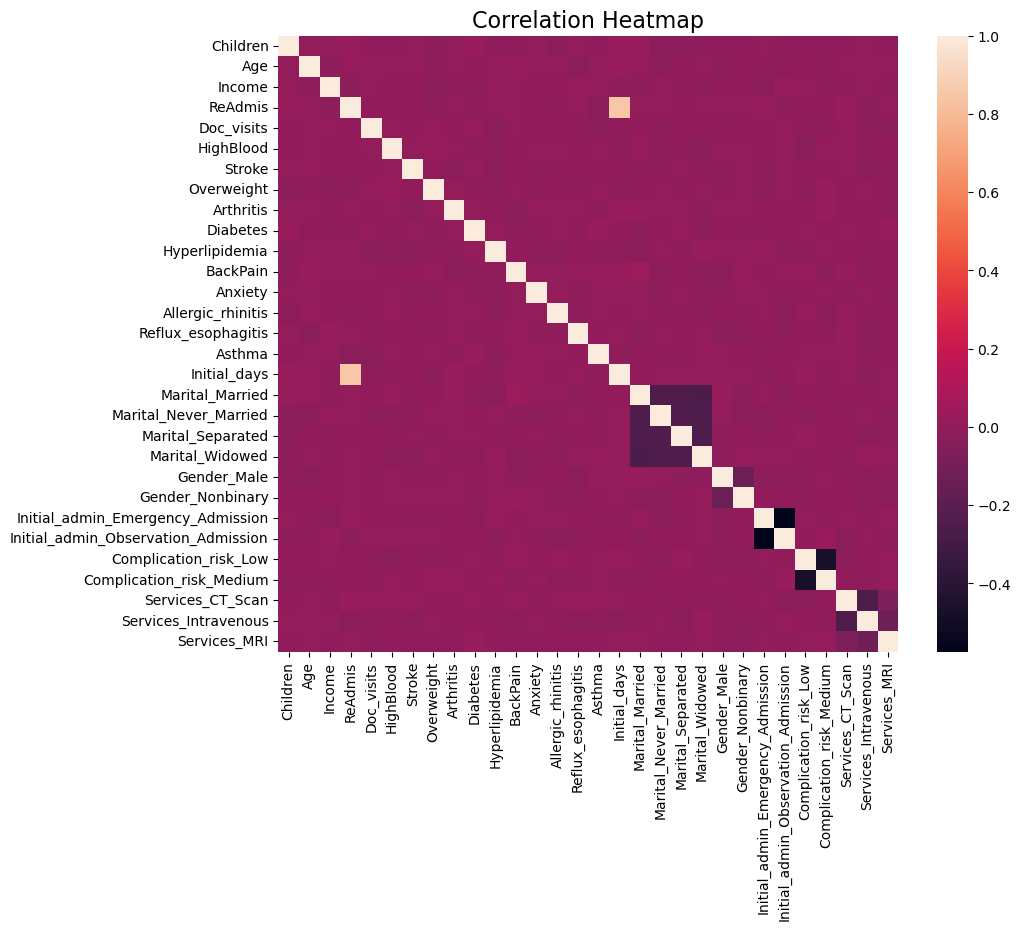

In [36]:
# Check for correlation using heatmap

plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(df.corr())

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()

In [37]:
# Save cleaned dataset
df.to_csv('medical_knn_clean.csv')

In [38]:
# Code adapted from:
# Elleh, F. (n.d.). Welcome to D209 Data Mining 1 [Lecture slides]. Western Governors University. Slide 30.

# Assign values to X for all predictor features
X = df[['Children', 'Age', 'Income', 'Doc_visits', 'HighBlood', 'Stroke','Overweight', 'Arthritis', 'Diabetes', 
        'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Marital_Married',
        'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 
        'Initial_admin_Emergency_Admission',  'Initial_admin_Observation_Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 
        'Services_CT_Scan', 'Services_Intravenous','Services_MRI']]
# Assign values to y for the dependent variable
y = df['ReAdmis']

# Initialize the class and call fit_transform
skbest = SelectKBest(score_func=f_classif, k='all')
X_new = skbest.fit_transform(X, y)

# Find p-values to select statistically significant features
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
features_to_keep = p_values['Feature'][p_values['p_value'] < 0.05]

# Print the name of the selected features and their p-values
print("Selected Features:")
print(features_to_keep)
print("\nP-values:")
print(p_values)

Selected Features:
25                     Services_CT_Scan
0                              Children
26                 Services_Intravenous
21    Initial_admin_Emergency_Admission
Name: Feature, dtype: object

P-values:
                                Feature   p_value
25                     Services_CT_Scan  0.014707
0                              Children  0.018613
26                 Services_Intravenous  0.042233
21    Initial_admin_Emergency_Admission  0.048766
14                               Asthma  0.086677
1                                   Age  0.113891
10                             BackPain  0.183133
22  Initial_admin_Observation_Admission  0.231263
2                                Income  0.250029
19                          Gender_Male  0.326515
27                         Services_MRI  0.351962
6                            Overweight  0.390612
18                      Marital_Widowed  0.390638
7                             Arthritis  0.443546
16                Marital_Never

In [39]:
# Check VIF for multicollinearity for selected features

# Create a new DataFrame with the selected features
X_new = X[features_to_keep]

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_new.columns
vif["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

# Print the VIFs
print(vif)

                             Feature       VIF
0                   Services_CT_Scan  1.117075
1                           Children  1.465967
2               Services_Intravenous  1.294930
3  Initial_admin_Emergency_Admission  1.474568


In [40]:
# Code adapted from:
# Elleh, F. (n.d.). Welcome to D209 Data Mining 1 [Lecture slides]. Western Governors University. Slide 35.
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42, stratify=y)

In [41]:
# Scaling process

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test set using the same scaler
X_test = scaler.transform(X_test)

In [42]:
# Save training and testing datasets as csv
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [43]:
# Find best number of neighbors to use for KNN classification, from 1-30
param_grid = {'n_neighbors' : np.arange(1, 30)}
# Instantiate the KNeighborsClassifier object
knn = KNeighborsClassifier()
# Instantiate the GridSearchCV object, search parameter grid
knn_cv = GridSearchCV(knn, param_grid)
# Fit to training data
knn_cv.fit(X_train, y_train)
# Find best parameter from GridSearchCV
print('The best parameters for this model: {}'.format(knn_cv.best_params_))

The best parameters for this model: {'n_neighbors': 28}


In [44]:
# Fit KNN model using grid search result
knn = KNeighborsClassifier(n_neighbors = 28)
knn.fit(X_train, y_train)
# Print model accuracy score
print('The accuracy score for KNN model is: {}'.format(knn.score(X_train, y_train)))
# Get accuracy scores for testing sets
print(f"The testing accuracy for KNN model is {knn.score(X_test, y_test)}\n")

The accuracy score for KNN model is: 0.63625
The testing accuracy for KNN model is 0.616



In [45]:
# Create confusion matrix
y_predicted = knn.predict(X_test)
print('The confusion matrix for KNN model')
print(confusion_matrix(y_test, y_predicted))

The confusion matrix for KNN model
[[1186   80]
 [ 688   46]]


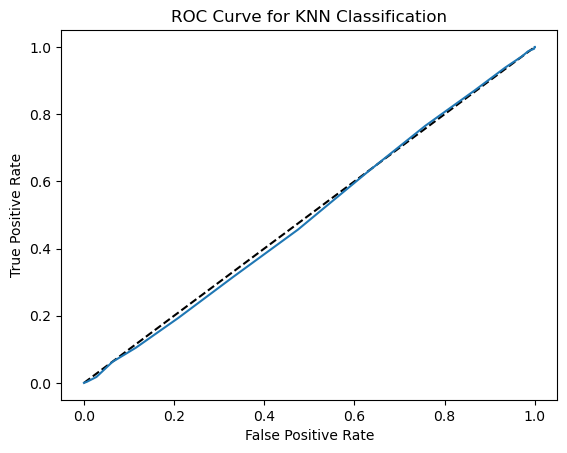

The Area Under the Curve (AUC) score is: 0.49380356504857714



In [46]:
# Generate ROC Curve
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
# Calculate AUC
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")

In [47]:
# Print classification report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.63      0.94      0.76      1266
           1       0.37      0.06      0.11       734

    accuracy                           0.62      2000
   macro avg       0.50      0.50      0.43      2000
weighted avg       0.53      0.62      0.52      2000

